# THE BATTLE OF NEIGHBORHOODS FROM COURSERA CAPSTONE

By Gastón Costa

# Introduction

The problem:

Hello, my name is Gastón. I am from Argentina but I have been living in Barcelona for 10 years. 

I love a good espresso coffee. In order to find the best espresso in Barcelona I tried out many coffees and once I've chosen the best one i stick with it. Now I'm going to live in New York. The culture of coffee is different in other countries and I'm afraid I won't be able to find enough coffe shops in NY. That's why I want to apply what I've learned so far to discover a neighbour where there're enough coffee shops in NY like Barcelona.

Business Model:

This work will be very helpful for other italians who want to live abroad and apply the same methodology to other cities.

# Data

Description of the data and how it will be used to solve the problem
The following data will be used:

-List of Boroughs and neighborhoods of Barcelona with their geodata;
-List of Boroughs and neighborhoods of Manhattan with their geodata;
-List of coffee shops of Barcelona with their geodata;
-List of coffee shops of Manhattan with their geodata.

# Data Sources

- Boroughs and neighborhoods of Barcelona from Wikipedia (https://es.wikipedia.org/wiki/Distritos_de_Barcelona);
- Boroughs and neighborhoods of New York from Wikipedia (https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City);
- Geocode information from Geopy;
- Accesories Shops in Barcelona and Toronto from Foursquare

# Methodology


- The neighborhood where I live in Barcelona will be individualized
- Stores related to design and accessories will be explored
- New York's various neighborhoods will be analyzed and a comparison will be made to find the best neighborhood to explore on our visit.

# Importing libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!pip install geopy 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install folium
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

# First: getting the data of Barcelona and processing them

In [2]:
link_barcelona = 'https://es.wikipedia.org/wiki/Distritos_de_Barcelona'
Barna= pd.read_html(link_barcelona)[0]
Barna

,Nº,Distrito,Imagen,Superficie km²[1]​,Población (2016)[2]​,Densidad hab/km²,Barrios (nº),Regidor
0,1,Ciudad Vieja,NaN,411,100 070,"22 424,28","El Raval (1), Barrio Gótico (2), La Barcelonet...",Gala Pin Ferrando (Barcelona en Comú)
1,2,Ensanche,NaN,746,264 305,"35 330,43","El Fort Pienc (5), Sagrada Familia (6), Dreta ...",Agustí Colom Cabau (Barcelona en Comú)
2,3,Sants-Montjuïc,NaN,2268,180 977,846951,"Pueblo Seco (11), La Marina del Prat Vermell (...",Jaume Asens Llodrà (Barcelona en Comú)
3,4,Les Corts,NaN,602,81 642,"13 355,26","Les Corts (19), La Maternidad y San Ramón (20)...",Laura Pérez Castaño (Barcelona en Comú)
4,5,Sarriá-San Gervasio,NaN,1990,148 026,725540,"Vallvidrera, el Tibidabo i les Planes (22), Sa...",Albert Batlle (Units per Avançar)
5,6,Gracia,NaN,419,120 918,"28 704,77","Vallcarca y los Penitentes (28), El Coll (29),...",Raimundo Viejo (Barcelona en Comú)
6,7,Horta - Guinardó,NaN,1196,167 268,"13 959,03","Baix Guinardó (33), Can Baró (34), El Guinardó...",Mercedes Vidal Lago (Barcelona en Comú)
7,8,Nou Barris,NaN,805,164 881,"20 462,19","Vilapicina y La Torre Llobeta (44), Porta (45)...",Janet Sanz Cid (Iniciativa per Catalunya - Verds)
8,9,San Andrés,NaN,659,146 731,"22 253,51","La Trinitat Vella (57), Baró de Viver (58), El...",Laia Ortiz i Castellví (Iniciativa per Catalun...
9,10,San Martín,NaN,1039,233 928,"21 539,72","El Campo del Arpa del Clot (64), El Clot (65),...",Josep Maria Montaner Martorell (Barcelona en C...


In [3]:
#Selecting and change the names of columns
Barna = Barna[['Distrito','Barrios (nº)']]
Barna.rename(columns = {'Distrito': 'District', 'Barrios (nº)': 'Neighbourhood'}, inplace = True)
Barna

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,District,Neighbourhood
0,Ciudad Vieja,"El Raval (1), Barrio Gótico (2), La Barcelonet..."
1,Ensanche,"El Fort Pienc (5), Sagrada Familia (6), Dreta ..."
2,Sants-Montjuïc,"Pueblo Seco (11), La Marina del Prat Vermell (..."
3,Les Corts,"Les Corts (19), La Maternidad y San Ramón (20)..."
4,Sarriá-San Gervasio,"Vallvidrera, el Tibidabo i les Planes (22), Sa..."
5,Gracia,"Vallcarca y los Penitentes (28), El Coll (29),..."
6,Horta - Guinardó,"Baix Guinardó (33), Can Baró (34), El Guinardó..."
7,Nou Barris,"Vilapicina y La Torre Llobeta (44), Porta (45)..."
8,San Andrés,"La Trinitat Vella (57), Baró de Viver (58), El..."
9,San Martín,"El Campo del Arpa del Clot (64), El Clot (65),..."


In Barcelona the neighborhoods are very small, so I will do the analysis on the district of Eixample


In [4]:
# Selecting my district
My_district = Barna[Barna['District'].str.contains('Ensanche', na = False)]
My_district

,District,Neighbourhood
1,Ensanche,"El Fort Pienc (5), Sagrada Familia (6), Dreta ..."


In [5]:
My_district.District = My_district.District.replace({"Ensanche": "Eixample"})
My_district

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,District,Neighbourhood
1,Eixample,"El Fort Pienc (5), Sagrada Familia (6), Dreta ..."


In [6]:
 #Getting latitude and longitude of my district
address = My_district['District'].values[0] + ', Barna'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of my district are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of my district are 41.3936885, 2.1636552.


In [7]:
# Creating a map of Milan and finding my district.
map_my_district = folium.Map(location=[latitude, longitude], zoom_start= 15)

folium.CircleMarker(
    [latitude, longitude],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_my_district)

map_my_district

# Extracting the number of shops in the district area

In [8]:
# Date from foursquare 
CLIENT_ID = '50W2M4K3ZWEVPUIT5GFGACTGJW1L0MBD34ICNCDRRCAF1XOR' # your Foursquare ID
CLIENT_SECRET = '1T4YYBZPYOIMVGGB5EE0QE05IDF3JY2ZCSMGSQGZDCLMPRDQ' # your Foursquare Secret
VERSION = '20191206'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 50W2M4K3ZWEVPUIT5GFGACTGJW1L0MBD34ICNCDRRCAF1XOR
CLIENT_SECRET:1T4YYBZPYOIMVGGB5EE0QE05IDF3JY2ZCSMGSQGZDCLMPRDQ


In [9]:
# We choose to search by category with a 600m radius.
radius = 600
LIMIT = 100
category_id = '4bf58dd8d48988d16d941735' #ID for BAR & CAFE

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, category_id, radius, LIMIT)

# Send the GET Request
results = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Il Caffé di Francesco,Café,"Passeig de Gràcia, 66",ES,Barcelona,España,NaN,79,"[Passeig de Gràcia, 66, 08007 Barcelona Catalu...","[{'label': 'display', 'lat': 41.39301453081708...",41.393015,2.163958,NaN,08007,Cataluña,4bac92ecf964a52002fc3ae3
1,Alsur Deli,Deli / Bodega,Rambla de Catalunya,ES,Barcelona,España,Rosselló,409,"[Rambla de Catalunya (Rosselló), Barcelona Cat...","[{'label': 'display', 'lat': 41.39433557804423...",41.394336,2.158832,NaN,NaN,Cataluña,53b58bc2498e8be468ec71c1
2,Forn de pa,Bakery,Perill 1,ES,Barcelona,España,NaN,636,"[Perill 1, 08012 Barcelona Cataluña, España]","[{'label': 'display', 'lat': 41.39894127845764...",41.398941,2.160637,La Vila de Gràcia,08012,Cataluña,4d297ea877a2a1cde2ab6cb7
3,Roma,Café,"Bonavista, 29",ES,Barcelona,España,NaN,635,"[Bonavista, 29, 08012 Barcelona Cataluña, España]","[{'label': 'display', 'lat': 41.39876174926758...",41.398762,2.160168,NaN,08012,Cataluña,4e8054bbbe7bae379b6c535c
4,Cafe Di Roma,Café,NaN,ES,Barcelona,España,NaN,172,"[08007 Barcelona Cataluña, España]","[{'label': 'display', 'lat': 41.39254683677922...",41.392547,2.165049,NaN,08007,Cataluña,4de664c145dda52a060bfe04
5,Sabor Cafe,Café,"Mallorca, 272",ES,Barcelona,España,NaN,176,"[Mallorca, 272, 08037 Barcelona Cataluña, España]","[{'label': 'display', 'lat': 41.39513941538664...",41.395139,2.164519,NaN,08037,Cataluña,4c0f5ce67189c928fdf0d9b6
6,Greco's of Brooklyn,Italian Restaurant,Mallorca 308,ES,Barcelona,España,NaN,494,"[Mallorca 308, 08037 Barcelona Cataluña, España]","[{'label': 'display', 'lat': 41.397273, 'lng':...",41.397273,2.167155,NaN,08037,Cataluña,5ac4ba219b04735f7543b78b
7,Boldú,Café,"C. de Provença, 233",ES,Barcelona,España,Rambla de Catalunya,336,"[C. de Provença, 233 (Rambla de Catalunya), 08...","[{'label': 'display', 'lat': 41.39336945260136...",41.393369,2.159654,NaN,08008,Cataluña,4f9176a2e4b07256ee76bd1d
8,El Fornet,Bakery,NaN,ES,Barcelona,España,NaN,363,"[Barcelona Cataluña, España]","[{'label': 'display', 'lat': 41.39502266644084...",41.395023,2.159679,NaN,NaN,Cataluña,4c78f4743badb1f7035b4d54
9,Nabucco Obrador,Bakery,Fraternitat 31,ES,Barcelona,España,Tordera,829,"[Fraternitat 31 (Tordera), 08012 Barcelona Cat...","[{'label': 'display', 'lat': 41.40069, 'lng': ...",41.400690,2.160263,La Vila de Gràcia,08012,Cataluña,5991e3869de23b5c0fe773b2


In [10]:
print('The total number of shops in an area of 1000 is: ' +str(dataframe_filtered.shape[0]))

The total number of shops in an area of 1000 is: 50


In [11]:
new_df = dataframe_filtered.drop(['labeledLatLngs','cc','formattedAddress','distance', 'postalCode','crossStreet',
                                  'country'], axis=1)
new_df.head()

,name,categories,address,city,lat,lng,neighborhood,state,id
0,Il Caffé di Francesco,Café,"Passeig de Gràcia, 66",Barcelona,41.393015,2.163958,NaN,Cataluña,4bac92ecf964a52002fc3ae3
1,Alsur Deli,Deli / Bodega,Rambla de Catalunya,Barcelona,41.394336,2.158832,NaN,Cataluña,53b58bc2498e8be468ec71c1
2,Forn de pa,Bakery,Perill 1,Barcelona,41.398941,2.160637,La Vila de Gràcia,Cataluña,4d297ea877a2a1cde2ab6cb7
3,Roma,Café,"Bonavista, 29",Barcelona,41.398762,2.160168,NaN,Cataluña,4e8054bbbe7bae379b6c535c
4,Cafe Di Roma,Café,NaN,Barcelona,41.392547,2.165049,NaN,Cataluña,4de664c145dda52a060bfe04


In [12]:
new_df.name
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred of Eixample

# add a red circle marker to represent the center of the neighborhoods 
folium.vector_layers.CircleMarker(
    [latitude,longitude],
    radius=10,
    color='red',
    popup='Eixample',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the shops as blue circle markers
for lat, lng, label in zip(new_df.lat, new_df.lng, new_df.categories):
    folium.vector_layers.CircleMarker(
        [lat,lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map


The number of Accessory stores in my district area is 49. Now we're going to search for this characteristic in New York

# Gathering New York data

In [13]:
# Importing the neighbourhood data

link_ny = 'https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City'

NY = pd.read_html(link_ny)[0]
NY.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood"
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge"
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit..."


In [14]:
# Selecting the columns we need and selecting manhattan.
NY = NY[['Community Board(CB)','Neighborhoods']]

NY.rename(columns = {'Community Board(CB)' : 'Borough'}, inplace = True)

NY = NY[NY['Borough'].str.contains('Manhattan', na = False)]
NY.reset_index(drop = True, inplace = True)
NY.head()

,Borough,Neighborhoods
0,Manhattan CB 1,"Battery Park City, Financial District, Tribeca"
1,Manhattan CB 2,"Chinatown, Greenwich Village, Little Italy, Lo..."
2,Manhattan CB 3,"Alphabet City, Chinatown, East Village, Lower ..."
3,Manhattan CB 4,"Chelsea, Clinton, Hell's Kitchen, Hudson Yards"
4,Manhattan CB 5,Midtown


In [15]:
# Separating the districts in different rows
NY = pd.DataFrame(NY.Neighborhoods.str.split(',').tolist(), index=NY.Borough.astype('object')).stack()

NY = NY.reset_index([0, 'Borough'])

NY.columns = ['Borough', 'District']
print(NY.shape)
NY.head()

(48, 2)


,Borough,District
0,Manhattan CB 1,Battery Park City
1,Manhattan CB 1,Financial District
2,Manhattan CB 1,Tribeca
3,Manhattan CB 2,Chinatown
4,Manhattan CB 2,Greenwich Village


In [16]:

NY.drop([26,41,43,44,45,46,47],inplace=True)

In [17]:
# Getting latitude and longitude NY 
lat = []
long = []

In [18]:
# This process must be repeated more times because after 20 iterations the service becomes unavailable
for i in np.arange(0,NY.shape[0]):
    address = NY['District'].values[i] + ', New York'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print(str(i)+'The geograpical coordinate of ' +address +' are {}, {}.'.format(latitude, longitude))
    lat.append(latitude)
    long.append(longitude)

0The geograpical coordinate of Battery Park City, New York are 40.7110166, -74.0169369.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


1The geograpical coordinate of  Financial District, New York are 40.7076124, -74.009378.
2The geograpical coordinate of  Tribeca, New York are 40.7153802, -74.0093063.
3The geograpical coordinate of Chinatown, New York are 40.7164913, -73.9962504.
4The geograpical coordinate of  Greenwich Village, New York are 40.7335844, -74.0028172.
5The geograpical coordinate of  Little Italy, New York are 40.7192728, -73.9982152.
6The geograpical coordinate of  Lower East Side, New York are 40.7159357, -73.9868057.
7The geograpical coordinate of  NoHo, New York are 40.7258746, -73.9939566.
8The geograpical coordinate of  SoHo, New York are 40.72288, -73.9987505.
9The geograpical coordinate of  West Village, New York are 40.7341857, -74.00558.
10The geograpical coordinate of Alphabet City, New York are 40.7251022, -73.9795833.
11The geograpical coordinate of  Chinatown, New York are 40.7164913, -73.9962504.
12The geograpical coordinate of  East Village, New York are 40.7292688, -73.9873613.
13The ge

In [19]:
# Inserting latitude and longitude in the DF
NY['latitude'] = lat
NY['longitude'] = long
NY.head()

,Borough,District,latitude,longitude
0,Manhattan CB 1,Battery Park City,40.711017,-74.016937
1,Manhattan CB 1,Financial District,40.707612,-74.009378
2,Manhattan CB 1,Tribeca,40.715380,-74.009306
3,Manhattan CB 2,Chinatown,40.716491,-73.996250
4,Manhattan CB 2,Greenwich Village,40.733584,-74.002817


In [20]:

# Creating a map of NY.

lat = 40.73
long = -73.98

map_NY = folium.Map(location=[lat, long], zoom_start=11)

for lat, long, label in zip(NY['latitude'], NY['longitude'], NY['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
    
map_NY

## An iteration through all the district is performed to get the higher number of shops

In [21]:
# Initializing the number of bars
N_bar = []

In [22]:
for i in NY.index:

    # We choose to search by category with a 500m radius.
    radius = 500
    LIMIT = 100
    category_id = '4bf58dd8d48988d16d941735' #ID for BAR & CAFE

    latitude = NY['latitude'][i]
    longitude = NY['longitude'][i]

    # Define the corresponding URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, category_id, radius, LIMIT)

    # Send the GET Request
    results = requests.get(url).json()

    # Get relevant part of JSON and transform it into a pandas dataframe
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    dataframe.head()

    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # function that extracts the category of the venue
    def get_category_type(row):
        try:
            categories_list = row['categories']
        except:
            categories_list = row['venue.categories']

        if len(categories_list) == 0:
            return None
        else:
            return categories_list[0]['name']

    # filter the category for each row
    dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
    
    print(str(i) + ') The number of bars in ' +NY['District'][i] + ' is ' +str(dataframe_filtered.shape[0]) + '\n')
    N_bar.append(dataframe_filtered.shape[0])

0) The number of bars in Battery Park City is 33

1) The number of bars in  Financial District is 49

2) The number of bars in  Tribeca is 47

3) The number of bars in Chinatown is 49

4) The number of bars in  Greenwich Village is 49

5) The number of bars in  Little Italy is 49

6) The number of bars in  Lower East Side is 44

7) The number of bars in  NoHo is 50

8) The number of bars in  SoHo is 50

9) The number of bars in  West Village is 48

10) The number of bars in Alphabet City is 24

11) The number of bars in  Chinatown is 49

12) The number of bars in  East Village is 49

13) The number of bars in  Lower East Side is 44

14) The number of bars in  Two Bridges is 24

15) The number of bars in Chelsea is 36

16) The number of bars in  Clinton is 2

17) The number of bars in  Hell's Kitchen is 17

18) The number of bars in  Hudson Yards is 22

19) The number of bars in Midtown is 50

20) The number of bars in Gramercy Park is 50

21) The number of bars in  Kips Bay is 24

22) 

In [23]:
NY['Number of cafes'] = N_bar
NY.head()

,Borough,District,latitude,longitude,Number of cafes
0,Manhattan CB 1,Battery Park City,40.711017,-74.016937,33
1,Manhattan CB 1,Financial District,40.707612,-74.009378,49
2,Manhattan CB 1,Tribeca,40.715380,-74.009306,47
3,Manhattan CB 2,Chinatown,40.716491,-73.996250,49
4,Manhattan CB 2,Greenwich Village,40.733584,-74.002817,49


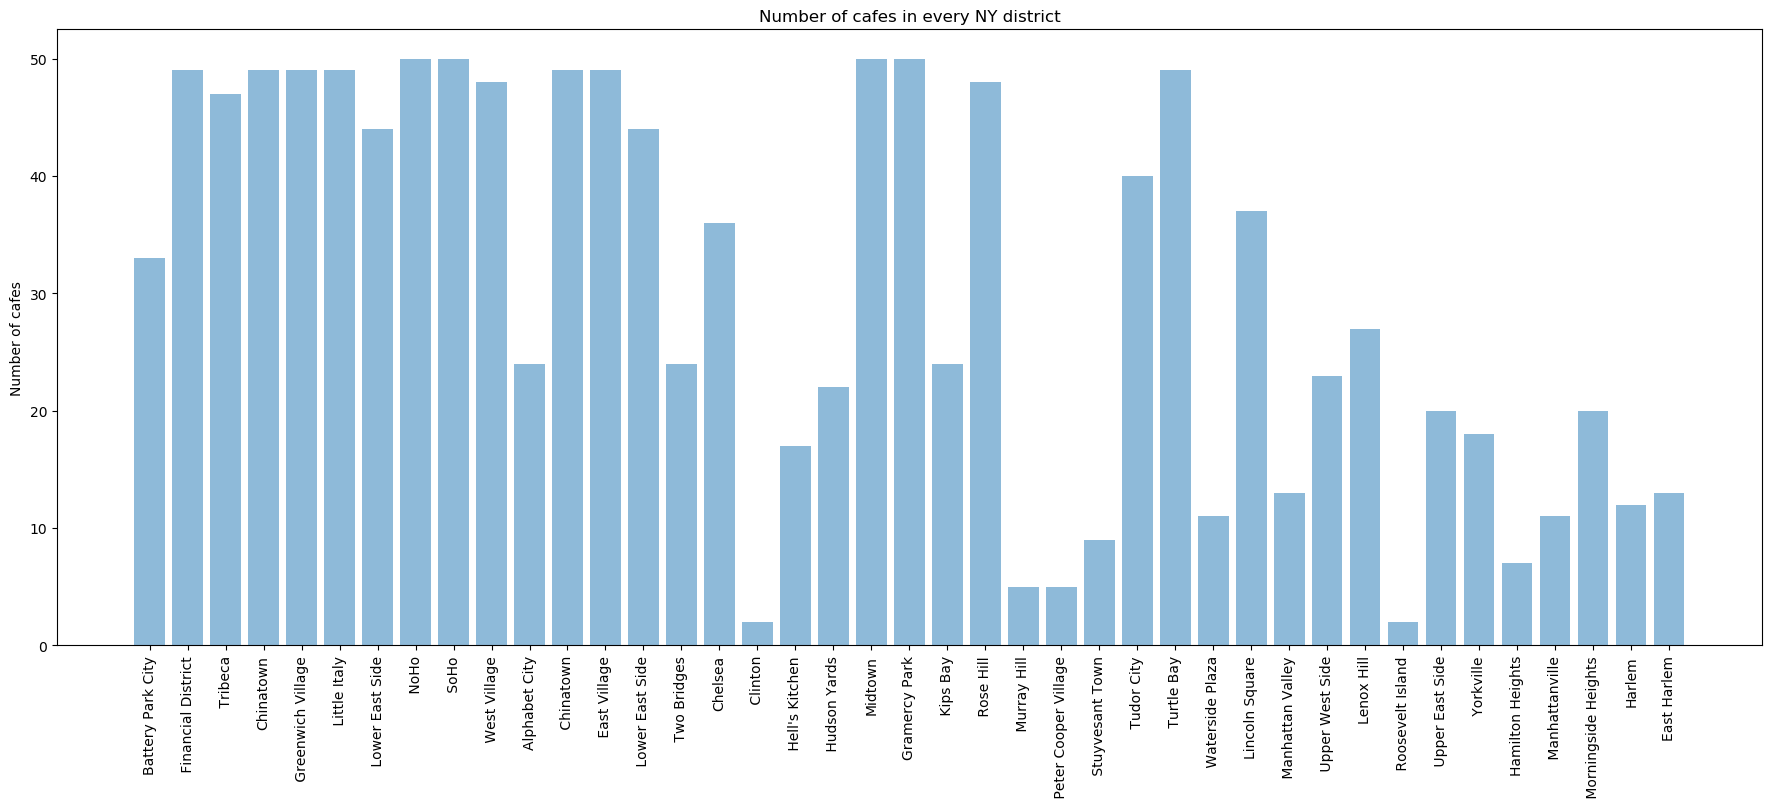

In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(22, 8), facecolor='w', edgecolor='k')

objects = NY['District']
y_pos = np.arange(len(objects))
performance = NY['Number of cafes'].values

plt.xticks(rotation=90)
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of cafes')
plt.title('Number of cafes in every NY district')

plt.show()

## Results

In [26]:
# Selecting the districts with the number of cafes higher than in Milan
NY = NY[NY['Number of cafes'] > 49]
NY

,Borough,District,latitude,longitude,Number of cafes
7,Manhattan CB 2,NoHo,40.725875,-73.993957,50
8,Manhattan CB 2,SoHo,40.722880,-73.998750,50
19,Manhattan CB 5,Midtown,40.760109,-73.978163,50
20,Manhattan CB 6,Gramercy Park,40.737925,-73.985932,50


In [27]:
print('The number of suitable district are: ' +str(NY.shape[0]))

The number of suitable district are: 4


## Map of the district in NY

In [28]:
# Creating a map of NY.

lat = 40.73
long = -73.98

map_NY = folium.Map(location=[lat, long], zoom_start=11)

for lat, long, label in zip(NY['latitude'], NY['longitude'], NY['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NY)  
    
map_NY

## Discussions

It turns out from this analysis that there's an high number of districts in Manhattan with an high concentration of cafes. This is what i expected from a cosmopolitan city like NY.

In this way now i know that i can go to NY and enjoy a good coffy everywhere.



# Conclusions
This methodology has been very helpful to choose the district in NY with the highest concentration of cafes. The advantage is that it can be applied to every city and for different categories like restaurants, museum or gyms thank to the flexibility provided by Foursquare.

In the future this could be strengthen providing also a review rate of the various cafes present in the district.

# Thank you